In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('gold_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold__data = gold_data.drop(['Date'], axis = 1)
print(gold__data)

              SPX         GLD        USO      SLV   EUR/USD
0     1447.160034   84.860001  78.470001  15.1800  1.471692
1     1447.160034   85.570000  78.370003  15.2850  1.474491
2     1411.630005   85.129997  77.309998  15.1670  1.475492
3     1416.180054   84.769997  75.500000  15.0530  1.468299
4     1390.189941   86.779999  76.059998  15.5900  1.557099
...           ...         ...        ...      ...       ...
2285  2671.919922  124.589996  14.060000  15.5100  1.186789
2286  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 5 columns]


Correlation:

Positive Correlation
Negative Correlation

In [10]:
correlation = gold__data.corr()

<Axes: >

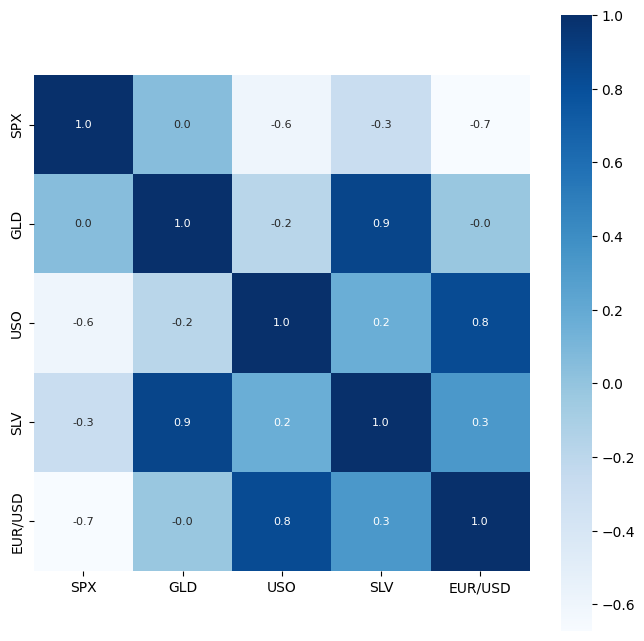

In [11]:
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Blues')

In [12]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\namra\AppData\Local\Temp\ipykernel_13024\591636870.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold__data['GLD'],color='pink')


<Axes: xlabel='GLD', ylabel='Density'>

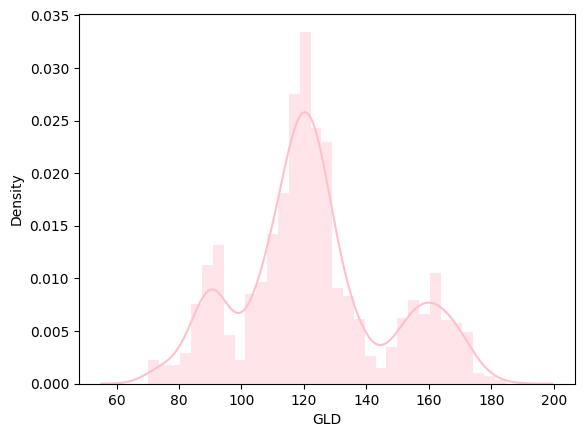

In [24]:
sns.distplot(gold__data['GLD'],color='pink')

In [25]:
X = gold__data.drop(['GLD'], axis = 1)
Y = gold__data['GLD']

In [26]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [27]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [29]:
regressor = RandomForestRegressor(n_estimators = 100)

In [30]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [31]:
#prediction on test data

In [32]:
test_data_prediction = regressor.predict(X_test)

In [33]:
print(test_data_prediction)


[168.50029939  82.06919981 116.2485997  127.68240078 120.86110143
 154.85319742 150.32639937 126.02980082 117.5182988  125.96200056
 116.42870125 171.63540101 141.12749855 167.67049835 115.27520037
 117.74130059 138.24300386 170.06630043 159.54980325 159.48610017
 155.08980003 125.22650008 175.65599955 157.14670428 125.19190031
  93.84079994  77.57760058 120.56250025 119.15659958 167.39830036
  88.13590031 125.11120004  91.15730078 117.68090016 121.14129897
 136.23380056 115.77420081 114.86230076 148.14039965 107.06720109
 103.75170223  87.16769789 126.4869007  117.92980018 153.52129903
 119.60790003 108.49310003 108.16829796  92.96869998 127.2026976
  74.93880039 113.69059941 121.23030047 111.41709906 118.80639889
 121.02719921 159.57029992 168.76130175 146.62159652  85.88739883
  94.15850014  86.727599    90.44520011 118.70370082 126.46820057
 127.63030003 169.38059992 122.22499929 117.29069884  98.47870054
 168.60860125 142.89899743 132.0640025  121.13660232 121.33979951
 119.871800

In [34]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9894729441981474


In [35]:
Y_test = list(Y_test)

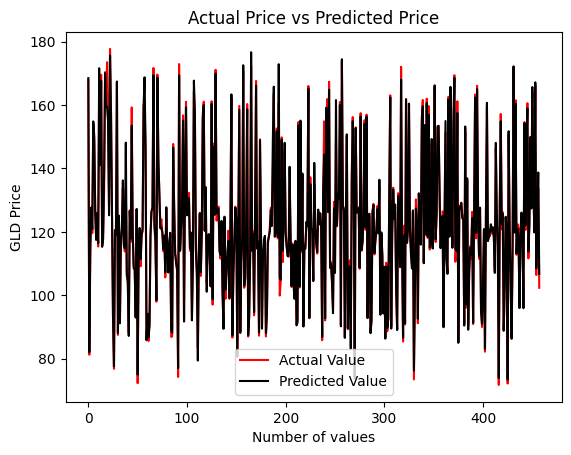

In [36]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='black', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [37]:
print("COMPLETED")

COMPLETED
